In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from mpl_toolkits import mplot3d
from utils import *

In [2]:
data = import_data('takens_1.txt')

# extract the first parameter from the input file
x = [val[0] for val in data]

# setup time axis
t = np.linspace(1, 1000, num=1000)

# shift the input data by delta_t lines to the left
delta_t = [100, 130, 160, 190]

# setup shifted data
x_shifted_0 = shift_data(x, delta_t[0])
x_shifted_1 = shift_data(x, delta_t[1])
x_shifted_2 = shift_data(x, delta_t[2])
x_shifted_3 = shift_data(x, delta_t[3])

shifted_data = [x_shifted_0, x_shifted_1, x_shifted_2, x_shifted_3]

Text(0.5, 1.0, 'takens_1_shiftet.txt')

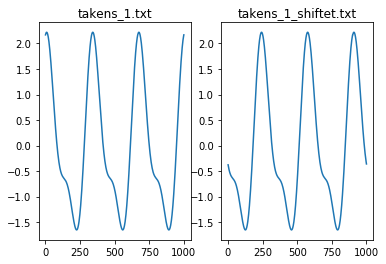

In [3]:
# compare the original first coordinate with the first coordinate 
# shifted by delta_t rows

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(t, x)
ax1.set_title("takens_1.txt")

ax2.plot(t, x_shifted_0)
ax2.set_title("takens_1_shiftet.txt")

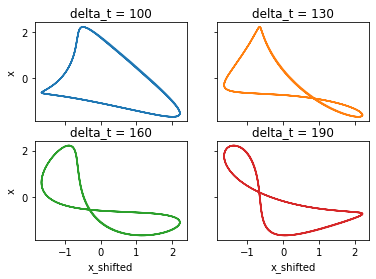

In [32]:
# plot the first coordinate againt the delayed version 
# for different delays with two axis

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_shifted_0, x)
axs[0, 0].set_title('delta_t = 100')
axs[0, 1].plot(x_shifted_1, x, 'tab:orange')
axs[0, 1].set_title('delta_t = 130')
axs[1, 0].plot(x_shifted_2, x, 'tab:green')
axs[1, 0].set_title('delta_t = 160')
axs[1, 1].plot(x_shifted_3, x, 'tab:red')
axs[1, 1].set_title('delta_t = 190')

for ax in axs.flat:
    ax.set(xlabel='x_shifted', ylabel='x')
  
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

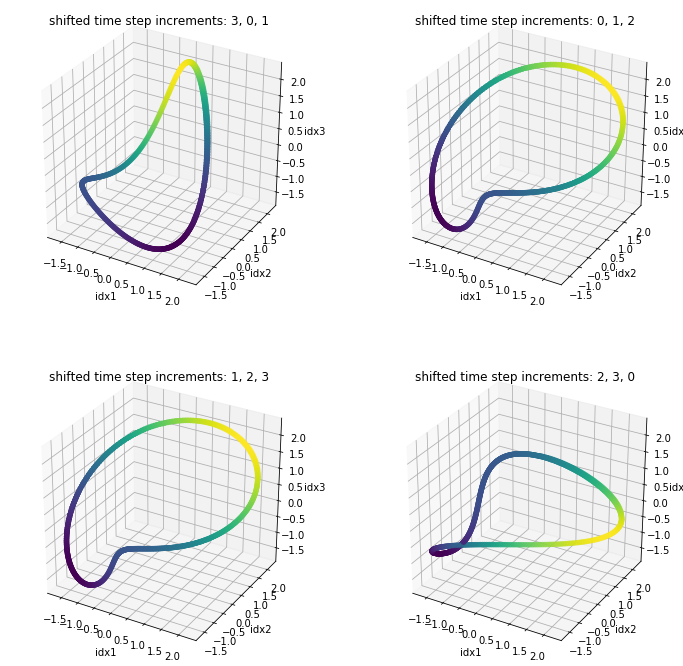

In [62]:
# plot the first coordinate againt delayed versions (3 delayed axis total) 
# for different combinations of axis 

fig, axs = plt.subplots(2,2,figsize=(12,12), subplot_kw=dict(projection='3d'))
for i,ax in enumerate(axs.flat):
    idx1, idx2, idx3 = (i-1)%4, i, (i+1)%4
    ax.scatter3D(shifted_data[idx1],shifted_data[idx2], shifted_data[idx3], c=shifted_data[idx2], cmap='viridis')
    ax.set_xlabel('idx1')
    ax.set_ylabel('idx2')
    ax.set_zlabel('idx3')
    ax.set_title("shifted time step increments: %s, %s, %s" % (idx1, idx2, idx3))